In [22]:
#STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
!pip install sweetviz
import sweetviz as sv
from sklearn.cluster import KMeans
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
trans_data = pd.read_excel ('dataset_customer.xls')#, 'data_frame')

In [4]:
trans_data.describe()
trans_data.head()
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   V1      65535 non-null  datetime64[ns]
 1   V2      65535 non-null  int64         
 2   V3      65535 non-null  int64         
 3   V4      65535 non-null  float64       
 4   V5      65535 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 2.5 MB


In [5]:
trans_data.rename(columns={'V1': 'purchase_date', 'V2': 'product','V3': 'customer_id','V4': 'units','V5': 'purchase_value'}, inplace=True)
trans_data.head()

,purchase_date,product,customer_id,units,purchase_value
0,2020-01-01,12982629,3474767,90.0,71.10
1,2020-01-01,12986007,3474767,40.0,72.00
2,2020-01-01,12993374,3458769,80.0,84.00
3,2020-01-01,13057957,3458769,56.0,204.96
4,2020-01-01,29274,44826,4.0,25.20


In [69]:
trans_data['purchase_year'] = pd.DatetimeIndex(trans_data['purchase_date']).year

today = pd.to_datetime("27/05/2020")

RFM_data = trans_data[['purchase_date', "customer_id", "purchase_value"]].groupby('customer_id').agg(
    recency = ('purchase_date', lambda x: pd.to_timedelta(today -x.max()).days),
    frequency = ('purchase_date', 'nunique'),
    monetary_value = ('purchase_value', sum)
).reset_index()

RFM_data.describe()

,customer_id,recency,frequency,monetary_value
count,1.914000e+03,1914.000000,1914.000000,1.914000e+03
mean,2.408497e+06,40.834378,7.936782,1.787815e+04
std,5.994062e+06,41.805830,11.791829,1.941946e+05
min,5.000000e+00,1.000000,1.000000,-3.152690e+03
25%,1.818250e+03,16.000000,1.000000,5.926500e+01
50%,3.637000e+03,23.000000,3.000000,5.719650e+02
75%,5.384500e+03,53.000000,9.000000,3.118887e+03
max,1.939532e+07,146.000000,70.000000,6.981448e+06


In [70]:
fig_2 = px.scatter(RFM_data, x='monetary_value', y='frequency')
fig_2.show()

In [72]:
RFM_data.describe()

,customer_id,recency,frequency,monetary_value
count,1.914000e+03,1914.000000,1914.000000,1.914000e+03
mean,2.408497e+06,40.834378,7.936782,1.787815e+04
std,5.994062e+06,41.805830,11.791829,1.941946e+05
min,5.000000e+00,1.000000,1.000000,-3.152690e+03
25%,1.818250e+03,16.000000,1.000000,5.926500e+01
50%,3.637000e+03,23.000000,3.000000,5.719650e+02
75%,5.384500e+03,53.000000,9.000000,3.118887e+03
max,1.939532e+07,146.000000,70.000000,6.981448e+06


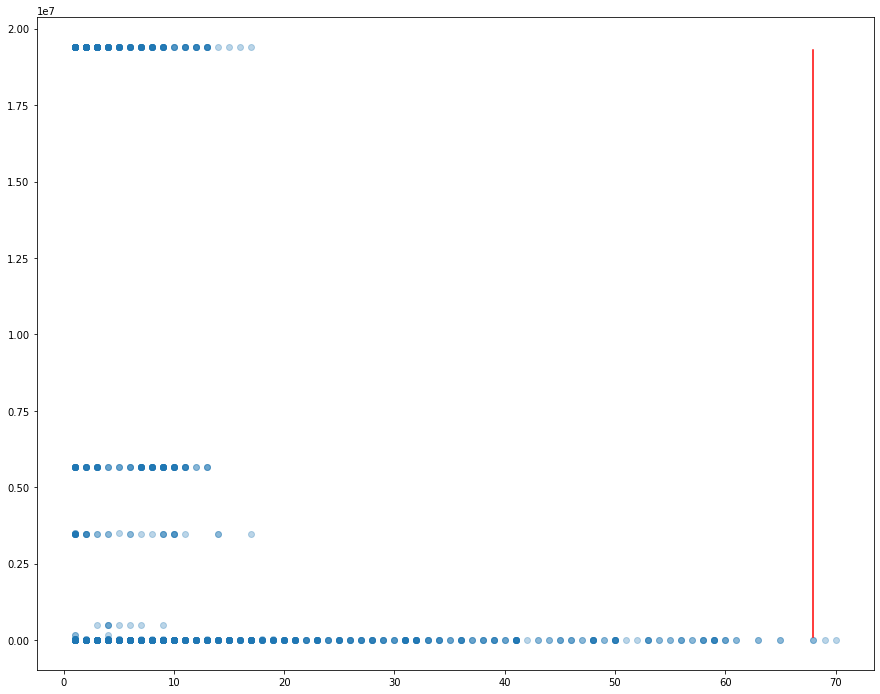

In [106]:
plt.figure(figsize=(15,12))
plt.axvline(x=68, ymin=0.05, ymax=0.95, color='r', label='axvline - % of full height')
plt.scatter( RFM_data["frequency"], RFM_data["customer_id"], alpha=0.3)
plt.show()

In [125]:
RFM = RFM_data.loc[(RFM_data['frequency'] < 70) & (RFM_data['frequency'] > 1)]

In [126]:
RFM.describe()

,customer_id,recency,frequency,monetary_value
count,1.373000e+03,1373.0000,1373.000000,1.373000e+03
mean,2.620800e+06,26.7815,10.619811,2.472929e+04
std,6.187104e+06,27.9986,12.842325,2.289357e+05
min,1.600000e+01,1.0000,2.000000,-3.152690e+03
25%,1.932000e+03,8.0000,3.000000,2.306700e+02
50%,3.854000e+03,20.0000,6.000000,1.194930e+03
75%,5.469000e+03,32.0000,12.000000,5.562260e+03
max,1.939532e+07,132.0000,69.000000,6.981448e+06


In [127]:
RFM.shape

(1373, 4)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



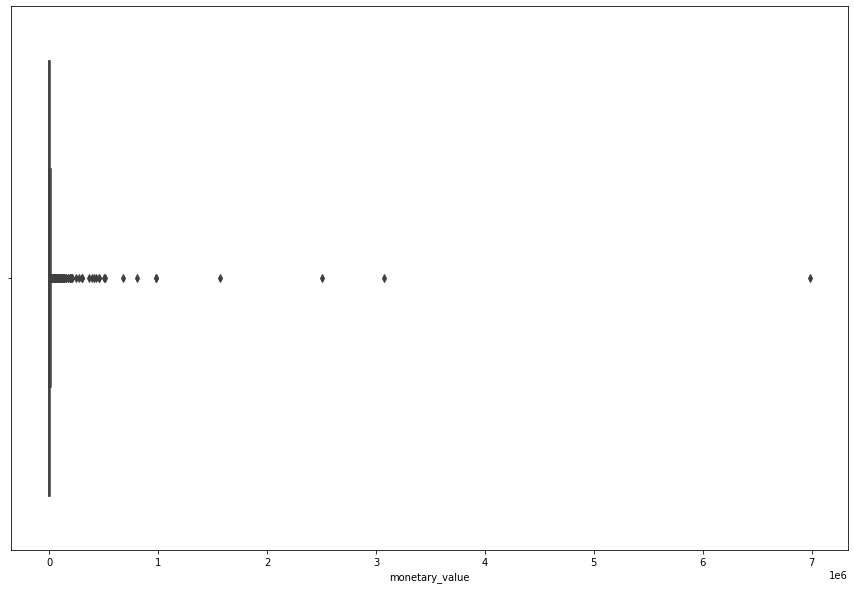

In [128]:
plt.figure(figsize=(15,10))
sns.boxplot(RFM["monetary_value"])
plt.show()

In [129]:
RFM1 = RFM.loc[(RFM['monetary_value'] < 1500) & (RFM['monetary_value'] > 0)]

In [130]:
RFM1.describe()

,customer_id,recency,frequency,monetary_value
count,7.120000e+02,712.000000,712.000000,712.000000
mean,1.948645e+06,34.176966,4.640449,444.148596
std,5.546692e+06,31.926817,3.834105,415.014368
min,1.600000e+01,1.000000,2.000000,4.100000
25%,1.680750e+03,17.000000,2.000000,90.712500
50%,3.587500e+03,23.000000,3.000000,302.245000
75%,5.087750e+03,33.000000,6.000000,720.625000
max,1.939528e+07,132.000000,32.000000,1492.150000


In [131]:
RFM1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 1912
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     712 non-null    int64  
 1   recency         712 non-null    int64  
 2   frequency       712 non-null    int64  
 3   monetary_value  712 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 27.8 KB


In [132]:
RFM1.shape

(712, 4)

In [133]:
RFM_NOCUST = RFM1[["recency", "frequency", "monetary_value"]]
kmeans = KMeans(n_clusters=5, random_state=123, n_init=1).fit(RFM_NOCUST)

In [134]:
RFM1['cluster'] = kmeans.predict(RFM_NOCUST)

<ipython-input-134-fa8fac15b3d1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
RFM1

,customer_id,recency,frequency,monetary_value,cluster
1,16,23,4,218.32,1
4,24,23,2,12.20,1
7,32,24,2,10.05,1
9,47,5,11,1094.44,0
10,53,16,4,44.60,1
...,...,...,...,...,...
1903,19395068,32,3,1105.00,0
1906,19395149,122,2,330.46,2
1908,19395189,53,4,703.45,3
1910,19395215,32,4,1398.10,4


In [136]:
RFM1['cluster'].value_counts()

1    322
2    146
3    122
0     70
4     52
Name: cluster, dtype: int64

In [138]:
RFM1.groupby(['cluster']).agg('mean')

,customer_id,recency,frequency,monetary_value
cluster,,,,
0,3.342311e+06,27.071429,6.714286,1039.090143
1,1.146043e+06,39.953416,3.090062,91.372267
2,2.125218e+06,30.465753,5.178082,387.792534
3,3.147890e+06,32.040984,5.467213,711.247705
4,1.733142e+06,23.403846,8.000000,1359.340192


In [142]:
RFM1.loc[RFM1['cluster'] == 4, 'cluster_label'] = "Champion"
RFM1.loc[RFM1['cluster'] == 0, 'cluster_label'] = "Loyal"
RFM1.loc[RFM1['cluster'] == 3, 'cluster_label'] = "Promising"
RFM1.loc[RFM1['cluster'] == 2, 'cluster_label'] = "At risk"
RFM1.loc[RFM1['cluster'] == 1, 'cluster_label'] = "Churn"

RFM1.groupby(['cluster_label']).agg('mean')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,customer_id,recency,frequency,monetary_value,cluster
cluster_label,,,,,
At risk,2.125218e+06,30.465753,5.178082,387.792534,2
Champion,1.733142e+06,23.403846,8.000000,1359.340192,4
Churn,1.146043e+06,39.953416,3.090062,91.372267,1
Loyal,3.342311e+06,27.071429,6.714286,1039.090143,0
Promising,3.147890e+06,32.040984,5.467213,711.247705,3


In [143]:
graphRFM = px.scatter_3d(RFM1, 
                      x='monetary_value', 
                      y='recency', 
                      z='frequency',
                      log_x=True,log_y=True,
                      color='cluster_label',
                      color_continuous_scale='Inferno')
graphRFM.show()